In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
df = pd.read_csv('Prod dataset 20210728.xlsx - Raw data.csv')
df.head()

,timestamp,lat,lon,temperature,atpressure,cloudiness,rain,windspeed,Relationship,job,...,Previous 10 days,Total Sleep (minutes),Min of heartRate,Max of heartRate,Average of heartRate,steps,distance,runDistance,calories,TARGET (Happiness)
0,5/12/21 0:36,38.924006,1.455704,17.42,1020,0,NaN,7.00,5,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,5/12/21 11:42,38.916601,1.420973,20.35,1017,0,NaN,7.20,3,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,5/12/21 14:47,38.922613,1.461175,21.33,1016,0,NaN,6.17,4,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,5/12/21 17:48,38.922609,1.461175,19.80,1014,20,NaN,5.36,4,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,5/12/21 20:54,38.922606,1.461176,18.06,1014,20,NaN,4.47,5,NaN,...,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [3]:
df.rename(columns={'TARGET (Happiness)': 'target', 'Refresh': 'refresh'}, inplace=True)

In [4]:
df['refresh'].median()

3.0

In [5]:
df['refresh'].fillna(3, inplace=True)

In [6]:
df['refresh'] = df['refresh'].astype(int)

In [7]:
df_numerical = df[['timestamp', 'Relationship', 'social', 'refresh', 'target']].copy()

In [8]:
df_numerical.head()

,timestamp,Relationship,social,refresh,target
0,5/12/21 0:36,5,2,3,5
1,5/12/21 11:42,3,3,3,4
2,5/12/21 14:47,4,2,3,4
3,5/12/21 17:48,4,3,3,5
4,5/12/21 20:54,5,3,3,4


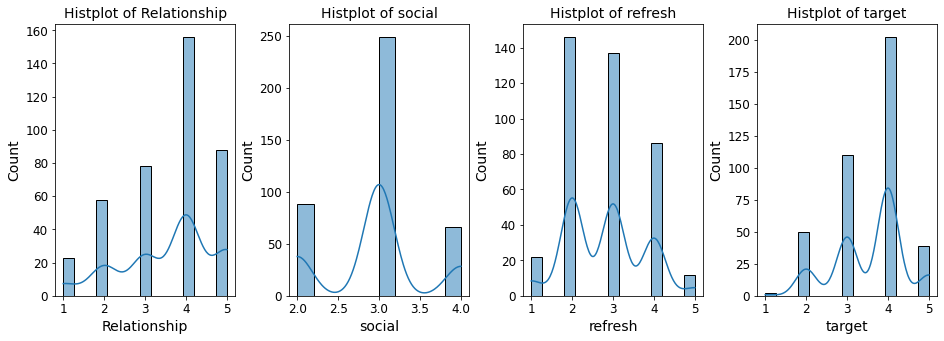

In [9]:
plt.figure(1, figsize=(20, 5))
n = 0
for x in df_numerical.columns[1:]:
    n += 1
    plt.subplot(1, 5, n)
    sns.histplot(df_numerical[x], kde=True)
    plt.title('Histplot of {}'.format(x), fontsize=14)
plt.subplots_adjust(wspace=0.3)
plt.show()

In [10]:
date_time = pd.to_datetime(df_numerical.pop('timestamp'))

In [11]:
df_numerical

,Relationship,social,refresh,target
0,5,2,3,5
1,3,3,3,4
2,4,2,3,4
3,4,3,3,5
4,5,3,3,4
...,...,...,...,...
398,5,4,2,5
399,5,4,4,5
400,5,4,4,5
401,5,4,5,4


In [12]:
df_numerical['timestamp'] = date_time.dt.strftime('%m/%d/%Y')

In [13]:
df_numerical

,Relationship,social,refresh,target,timestamp
0,5,2,3,5,05/12/2021
1,3,3,3,4,05/12/2021
2,4,2,3,4,05/12/2021
3,4,3,3,5,05/12/2021
4,5,3,3,4,05/12/2021
...,...,...,...,...,...
398,5,4,2,5,07/26/2021
399,5,4,4,5,07/26/2021
400,5,4,4,5,07/26/2021
401,5,4,5,4,07/26/2021


In [14]:
df_numerical['timestamp'][0]

'05/12/2021'

In [15]:
df_num = df_numerical.groupby('timestamp').mean().reset_index().copy()

In [16]:
date_time = df_num.pop('timestamp')

In [17]:
df_num.head()

,Relationship,social,refresh,target
0,4.2,2.600000,3.000000,4.400000
1,3.0,2.714286,3.428571,3.285714
2,4.5,2.750000,3.000000,4.000000
3,1.5,2.000000,2.500000,2.000000
4,2.4,3.000000,2.600000,2.800000


In [18]:
df_num.head()

,Relationship,social,refresh,target
0,4.2,2.600000,3.000000,4.400000
1,3.0,2.714286,3.428571,3.285714
2,4.5,2.750000,3.000000,4.000000
3,1.5,2.000000,2.500000,2.000000
4,2.4,3.000000,2.600000,2.800000


In [19]:
date_time = pd.to_datetime(date_time)

In [20]:
timestamp = date_time.map(pd.Timestamp.timestamp)

Being personal data it has weekly and yearly periodicity. There are many ways you could deal with periodicity.

A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals

In [21]:
day = 24*60*60
week = 7*day


df_num['Week sin'] = np.sin(timestamp * (2 * np.pi / week))
df_num['Week cos'] = np.cos(timestamp * (2 * np.pi / week))

Text(0.5, 1.0, 'Time of week signal')

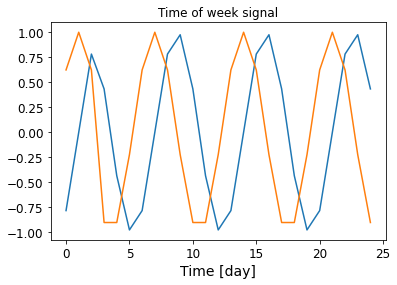

In [22]:
plt.plot(np.array(df_num['Week sin'])[:25])
plt.plot(np.array(df_num['Week cos'])[:25])
plt.xlabel('Time [day]')
plt.title('Time of week signal')

In [23]:
df_num.head()

,Relationship,social,refresh,target,Week sin,Week cos
0,4.2,2.600000,3.000000,4.400000,-7.818315e-01,0.623490
1,3.0,2.714286,3.428571,3.285714,-1.395375e-12,1.000000
2,4.5,2.750000,3.000000,4.000000,7.818315e-01,0.623490
3,1.5,2.000000,2.500000,2.000000,4.338837e-01,-0.900969
4,2.4,3.000000,2.600000,2.800000,-4.338837e-01,-0.900969


In [24]:
column_indices = {name: i for i, name in enumerate(df_num.columns)}

n = len(df_num)
train_df = df_num[0:int(n*0.7)]
val_df = df_num[int(n*0.7):int(n*0.9)]
test_df = df_num[int(n*0.9):]

num_features = df_num.shape[1]

In [25]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    print(self.column_indices)
    print(self.label_columns)
  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [26]:
w1 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['target'])
w1

{'Relationship': 0, 'social': 1, 'refresh': 2, 'target': 3, 'Week sin': 4, 'Week cos': 5}
['target']


Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['target']

In [27]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [28]:
import tensorflow as tf

In [29]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[10:10+w1.total_window_size])])

In [30]:
example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (2, 7, 6)
Inputs shape: (2, 6, 6)
labels shape: (2, 1, 1)


In [31]:
w1.example = example_inputs, example_labels

In [32]:
def plot(self, model=None, plot_col='target', max_subplots=3, fig_name='a'):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      print(predictions[n, :, label_col_index])
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time[day]')
  save_fig(fig_name)


WindowGenerator.plot = plot

Saving figure w1_window


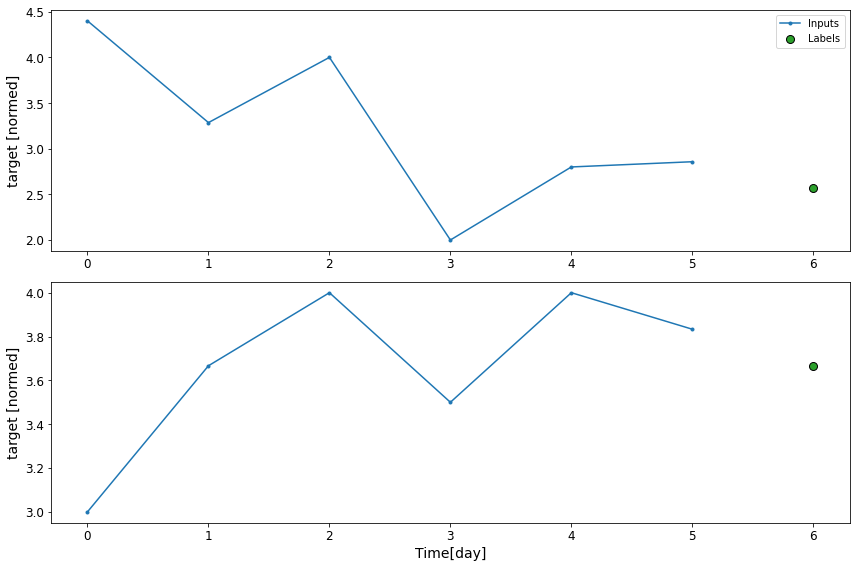

In [33]:
w1.plot(fig_name='w1_window')

Saving figure a


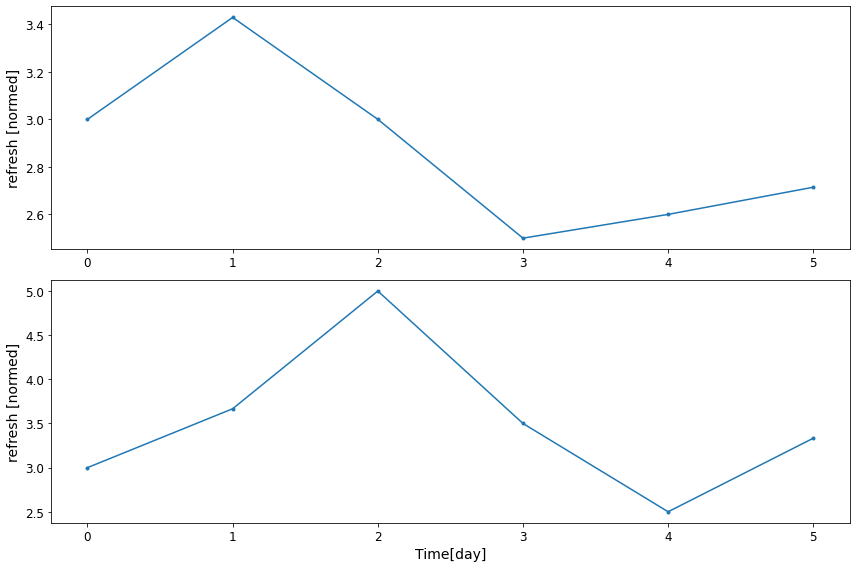

In [34]:
w1.plot(plot_col='refresh')

In [35]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=8,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [36]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [37]:
# Each element is an (inputs, label) pair
w1.train.element_spec

(TensorSpec(shape=(None, 6, 6), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [38]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
#   print(example_inputs[0])
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (8, 6, 6)
Labels shape (batch, time, features): (8, 1, 1)


In [39]:
w1.train.take(2)

<TakeDataset shapes: ((None, 6, 6), (None, 1, 1)), types: (tf.float32, tf.float32)>

In [40]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

{'Relationship': 0, 'social': 1, 'refresh': 2, 'target': 3, 'Week sin': 4, 'Week cos': 5}
['target']


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

In [41]:
for example_inputs, example_labels in single_step_window.train.take(7):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (8, 1, 6)
Labels shape (batch, time, features): (8, 1, 1)
Inputs shape (batch, time, features): (8, 1, 6)
Labels shape (batch, time, features): (8, 1, 1)
Inputs shape (batch, time, features): (8, 1, 6)
Labels shape (batch, time, features): (8, 1, 1)
Inputs shape (batch, time, features): (8, 1, 6)
Labels shape (batch, time, features): (8, 1, 1)
Inputs shape (batch, time, features): (8, 1, 6)
Labels shape (batch, time, features): (8, 1, 1)
Inputs shape (batch, time, features): (8, 1, 6)
Labels shape (batch, time, features): (8, 1, 1)
Inputs shape (batch, time, features): (4, 1, 6)
Labels shape (batch, time, features): (4, 1, 1)


In [42]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [43]:
single_step_window.test.take(1)

<TakeDataset shapes: ((None, 1, 6), (None, 1, 1)), types: (tf.float32, tf.float32)>

In [44]:
column_indices

{'Relationship': 0,
 'social': 1,
 'refresh': 2,
 'target': 3,
 'Week sin': 4,
 'Week cos': 5}

In [45]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

2/2 [==============================] - 0s 2ms/step - loss: 0.5886 - mean_absolute_error: 0.6095


In [46]:
performance

{'Baseline': [0.12889735400676727, 0.3146257996559143]}

In [47]:
wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1,
    label_columns=['target'])

wide_window

{'Relationship': 0, 'social': 1, 'refresh': 2, 'target': 3, 'Week sin': 4, 'Week cos': 5}
['target']


Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['target']

In [48]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (8, 7, 6)
Output shape: (8, 7, 1)


tf.Tensor([3.2857144 4.        2.        2.8       2.857143  2.5714285 3.4285715], shape=(7,), dtype=float32)
tf.Tensor([2.8       2.857143  2.5714285 3.4285715 2.625     3.        3.       ], shape=(7,), dtype=float32)
tf.Tensor([4.        3.8333333 3.6666667 4.3333335 4.        3.2       2.25     ], shape=(7,), dtype=float32)
Saving figure baseline_model


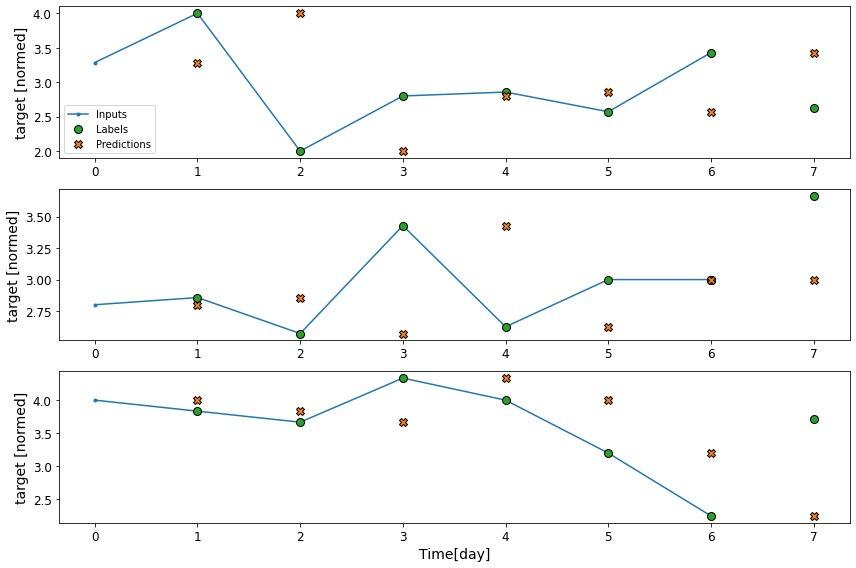

In [49]:
wide_window.plot(baseline, fig_name='baseline_model')

In [50]:
from tensorflow import keras

In [51]:
linear = keras.models.Sequential([
    keras.layers.Dense(1)
])

In [52]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (8, 1, 6)
Output shape: (8, 1, 1)


In [53]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [54]:
history = compile_and_fit(linear, wide_window)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=0)
val_performance['Linear'] = linear.evaluate(wide_window.val)

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 9.0285 - mean_absolute_error: 2.8134 - val_loss: 9.4285 - val_mean_absolute_error: 2.9637
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 8.5613 - mean_absolute_error: 2.7328 - val_loss: 8.9385 - val_mean_absolute_error: 2.8814
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 8.1178 - mean_absolute_error: 2.6525 - val_loss: 8.4638 - val_mean_absolute_error: 2.7993
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 7.6783 - mean_absolute_error: 2.5725 - val_loss: 8.0087 - val_mean_absolute_error: 2.7184
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 7.2620 - mean_absolute_error: 2.4937 - val_loss: 7.5707 - val_mean_absolute_error: 2.6381
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 6.8676 - mean_absolute_error: 2.4171 - val_loss: 7.1492 - val_mean_absolute_error: 2.5585
Epoch 7/100
6/6 [===========

6/6 [==============================] - 0s 10ms/step - loss: 0.8073 - mean_absolute_error: 0.7457 - val_loss: 0.5875 - val_mean_absolute_error: 0.5983
Epoch 52/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7945 - mean_absolute_error: 0.7407 - val_loss: 0.5713 - val_mean_absolute_error: 0.5943
Epoch 53/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7838 - mean_absolute_error: 0.7368 - val_loss: 0.5560 - val_mean_absolute_error: 0.5903
Epoch 54/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7741 - mean_absolute_error: 0.7330 - val_loss: 0.5420 - val_mean_absolute_error: 0.5865
Epoch 55/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7643 - mean_absolute_error: 0.7287 - val_loss: 0.5300 - val_mean_absolute_error: 0.5831
Epoch 56/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7567 - mean_absolute_error: 0.7254 - val_loss: 0.5188 - val_mean_absolute_error: 0.5797
Epoch 57/100
6/6 [=================

1/1 [==============================] - 0s 48ms/step - loss: 0.3947 - mean_absolute_error: 0.5199


In [55]:
performance

{'Baseline': [0.12889735400676727, 0.3146257996559143],
 'Linear': [0.1632300615310669, 0.3035530745983124]}

In [56]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (8, 7, 6)
Output shape: (8, 7, 1)


tf.Tensor([3.6974838 3.4810054 2.711779  3.452145  3.4007688 3.5544112 3.6814117], shape=(7,), dtype=float32)
tf.Tensor([3.452145  3.4007688 3.5544112 3.6814117 3.3180263 3.5466187 3.6776164], shape=(7,), dtype=float32)
tf.Tensor([3.343319  4.167944  3.8853495 4.766753  3.8404486 3.0759687 2.7198088], shape=(7,), dtype=float32)
Saving figure linear_model


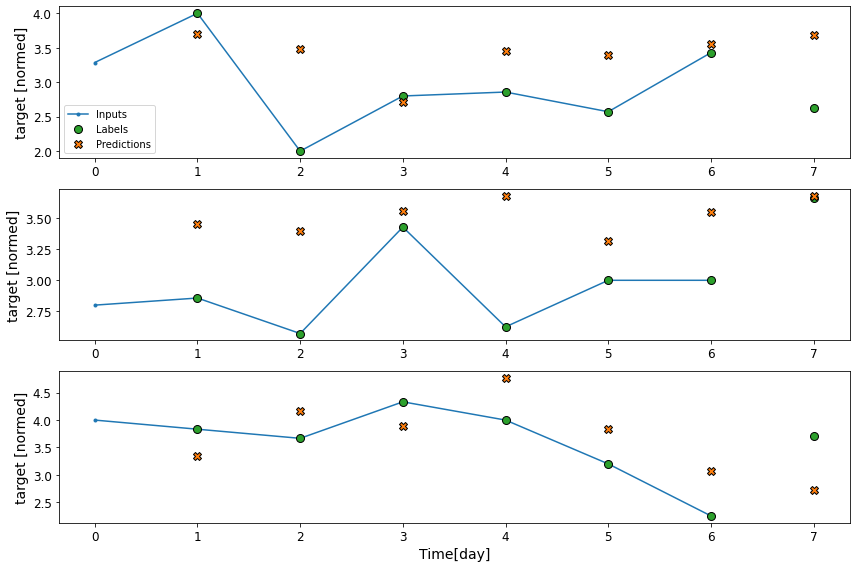

In [57]:
wide_window.plot(linear, fig_name='linear_model')

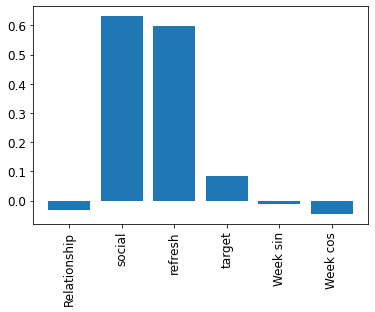

In [58]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [59]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
6/6 [==============================] - 1s 29ms/step - loss: 6.0051 - mean_absolute_error: 2.3382 - val_loss: 2.6721 - val_mean_absolute_error: 1.5460
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 1.9329 - mean_absolute_error: 1.2404 - val_loss: 0.4922 - val_mean_absolute_error: 0.5655
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6315 - mean_absolute_error: 0.6570 - val_loss: 0.4897 - val_mean_absolute_error: 0.5635
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.7429 - mean_absolute_error: 0.6518 - val_loss: 0.7571 - val_mean_absolute_error: 0.7317
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 0.5423 - mean_absolute_error: 0.6022


In [60]:
performance['Dense']

[0.3552282750606537, 0.4840199053287506]

tf.Tensor([3.835737  4.106131  2.7549999 3.4650233 3.4974864 3.3776433 3.717604 ], shape=(7,), dtype=float32)
tf.Tensor([3.4650233 3.4974864 3.3776433 3.717604  3.3721573 3.6335475 3.789602 ], shape=(7,), dtype=float32)
tf.Tensor([3.983886  4.4183927 4.1551065 5.000242  4.2192507 3.4314299 2.8705463], shape=(7,), dtype=float32)
Saving figure linear_dense_model


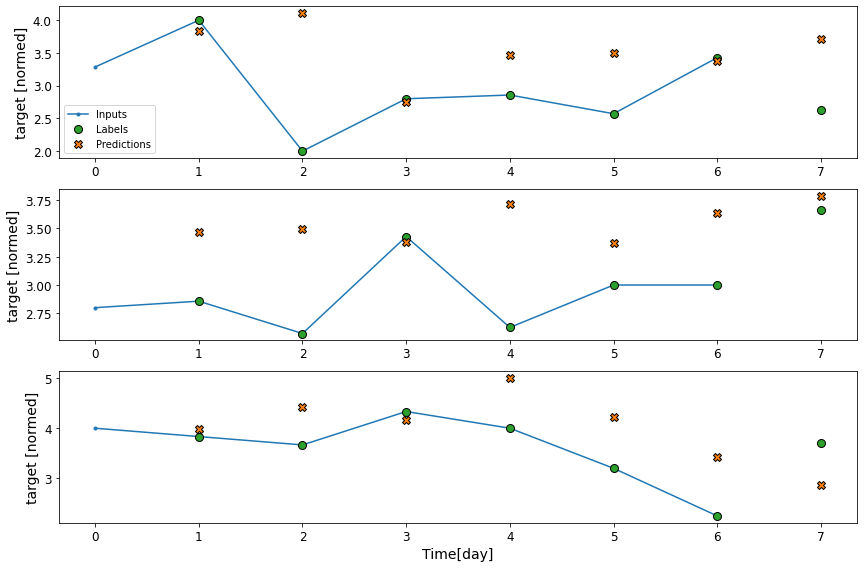

In [61]:
wide_window.plot(dense, fig_name='linear_dense_model')

In [62]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window

{'Relationship': 0, 'social': 1, 'refresh': 2, 'target': 3, 'Week sin': 4, 'Week cos': 5}
['target']


Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['target']

In [63]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

Saving figure a


Text(0.5, 1.0, 'Given 3days as input, predict 1 day into the future.')

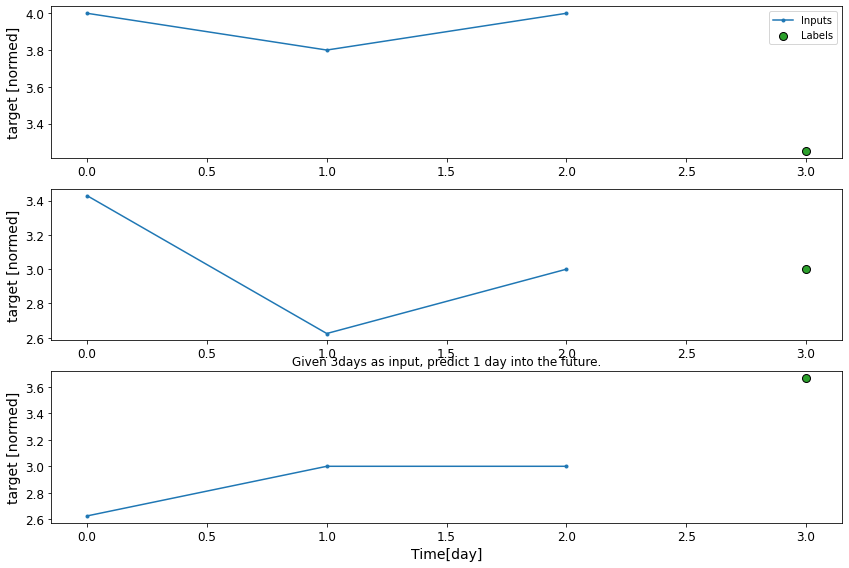

In [64]:
conv_window.plot()
plt.title("Given 3days as input, predict 1 day into the future.")

In [65]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [66]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (8, 3, 6)
Output shape: (8, 1, 1)


In [67]:
import IPython
import IPython.display

In [68]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

2/2 [==============================] - 0s 2ms/step - loss: 0.3731 - mean_absolute_error: 0.5210


In [69]:
performance['Multi step dense']

[0.16274526715278625, 0.3473086357116699]

tf.Tensor([3.8131216], shape=(1,), dtype=float32)
tf.Tensor([3.27235], shape=(1,), dtype=float32)
tf.Tensor([3.458038], shape=(1,), dtype=float32)
Saving figure conv_model


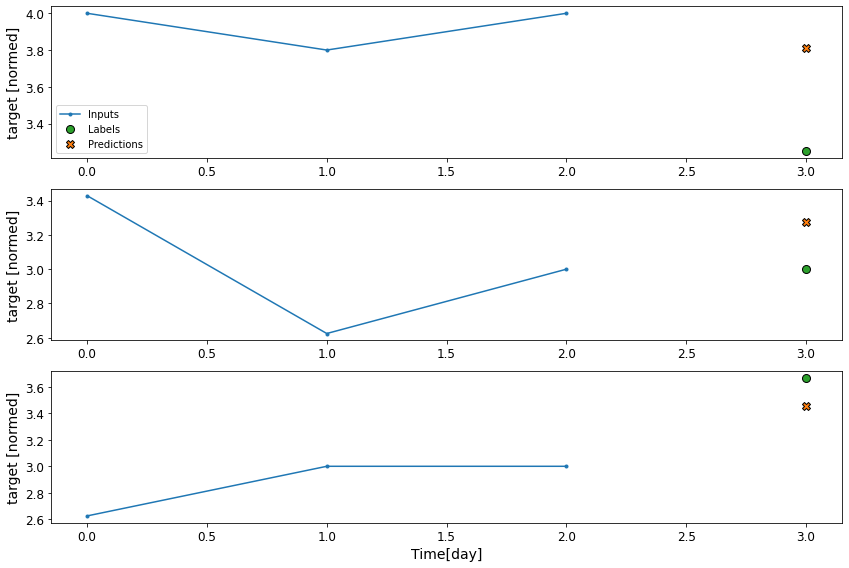

In [70]:
conv_window.plot(multi_step_dense, fig_name='conv_model')

In [71]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (8, 7, 6)

ValueError:Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 18 but received input with shape (8, 42)


In [72]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [73]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (8, 3, 6)
Output shape: (8, 1, 1)


In [74]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

2/2 [==============================] - 0s 2ms/step - loss: 1.0894 - mean_absolute_error: 0.8708


In [75]:
performance['Conv']

[0.5234659314155579, 0.6834995746612549]

In [76]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (8, 7, 6)
Labels shape: (8, 7, 1)
Output shape: (8, 5, 1)


In [77]:
LABEL_WIDTH = 7
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

{'Relationship': 0, 'social': 1, 'refresh': 2, 'target': 3, 'Week sin': 4, 'Week cos': 5}
['target']


Total window size: 10
Input indices: [0 1 2 3 4 5 6 7 8]
Label indices: [3 4 5 6 7 8 9]
Label column name(s): ['target']

In [78]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (8, 9, 6)
Labels shape: (8, 7, 1)
Output shape: (8, 7, 1)


tf.Tensor([4.611595  4.81956   3.928445  2.922331  2.6293757 3.2409918 3.6336608], shape=(7,), dtype=float32)
tf.Tensor([3.1899922 3.8068182 4.4055047 4.343096  4.0695133 4.01257   4.1234283], shape=(7,), dtype=float32)
tf.Tensor([2.8435419 2.8066328 3.0980265 3.3313317 3.3404953 3.4352345 3.5894563], shape=(7,), dtype=float32)
Saving figure wide_conv_model


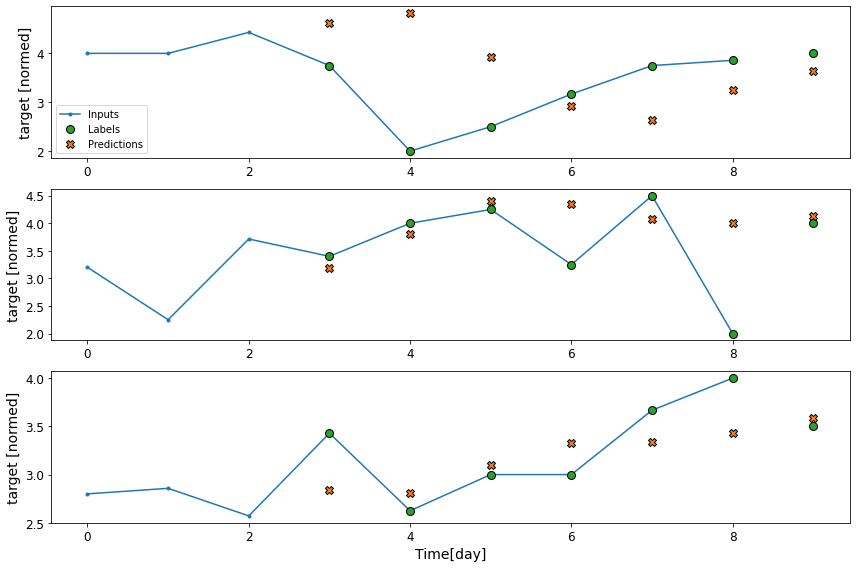

In [79]:
wide_conv_window.plot(conv_model, fig_name='wide_conv_model')

In [80]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [81]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (8, 7, 6)
Output shape: (8, 7, 1)


In [90]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 0s 45ms/step - loss: 0.2521 - mean_absolute_error: 0.4328


In [91]:
performance['LSTM']

[0.09339259564876556, 0.21242110431194305]

tf.Tensor([3.3974802 3.8158724 3.1002998 3.3780103 3.3533206 3.186016  3.2716541], shape=(7,), dtype=float32)
tf.Tensor([3.1632493 3.3274138 3.071599  3.1832113 3.2623243 3.415491  3.571014 ], shape=(7,), dtype=float32)
tf.Tensor([3.6593175 3.675068  3.5082517 3.932281  3.662041  3.370534  2.977201 ], shape=(7,), dtype=float32)
Saving figure wide_lstm_model


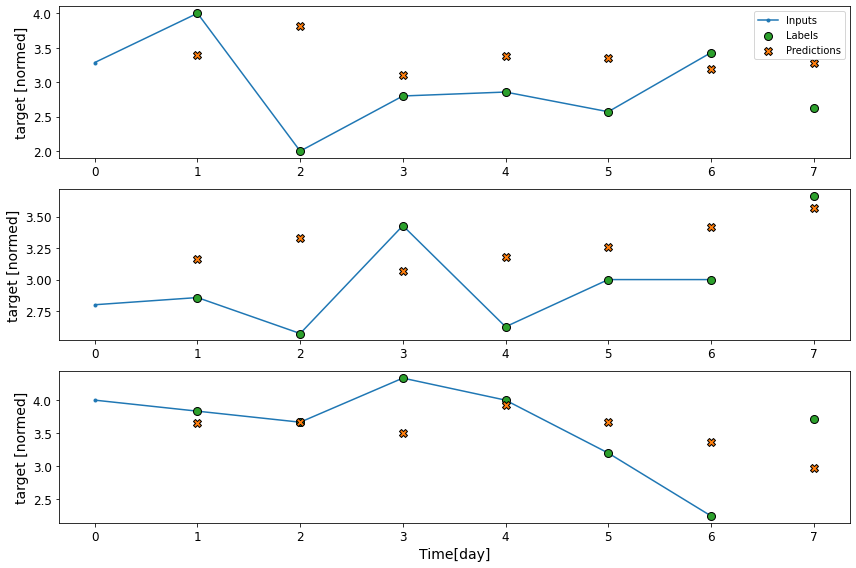

In [92]:
wide_window.plot(lstm_model, fig_name='wide_lstm_model')

[0.6095238327980042, 0.5198556780815125, 0.602229654788971, 0.5209841728210449, 0.8707523345947266, 0.43275588750839233]
[0.3146257996559143, 0.3035530745983124, 0.4840199053287506, 0.3473086357116699, 0.6834995746612549, 0.21242110431194305]
Saving figure Performance of each model for forecasting


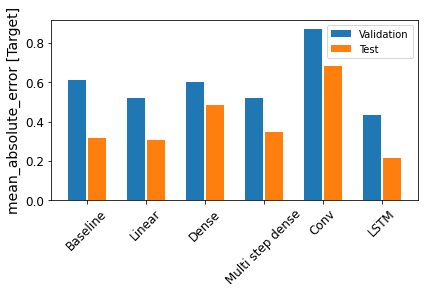

In [93]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]
print(val_mae)
print(test_mae)
plt.ylabel('mean_absolute_error [Target]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

save_fig('Performance of each model for forecasting')

In [94]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.3146
Linear      : 0.3036
Dense       : 0.4840
Multi step dense: 0.3473
Conv        : 0.6835
LSTM        : 0.2124


In [87]:
test_df[:2]

,Relationship,social,refresh,target,Week sin,Week cos
68,4.500000,4.0,2.000000,4.0,0.781831,0.623490
69,4.285714,4.0,2.714286,4.0,0.974928,-0.222521


In [88]:
lstm_model.predict(wide_window.test)

array([[[3.8195171],
        [3.810292 ],
        [3.619537 ],
        [3.8323953],
        [3.494937 ],
        [3.478989 ],
        [3.7183826]]], dtype=float32)

In [89]:
pd.DataFrame(data={'Validation set': val_mae, 'Test set': test_mae})

,Validation set,Test set
0,0.609524,0.314626
1,0.519856,0.303553
2,0.602230,0.484020
3,0.520984,0.347309
4,0.870752,0.683500
5,0.441988,0.198300
